# HW 3 : Convex Optimisation

### Gradient Descent 

In [1]:
# Import all the required libraries
import numpy as np
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='gruvboxd', context='notebook', ticks=True, grid=False)

## Steepest Descent (without line search)
Two-dimensional Gaussian function used is : $Gauss(x,y) = e^{-(\frac{(x-\mu_x)^2}{2\sigma_x^2}+\frac{(y-\mu_y)^2}{2\sigma_y^2})}\\$
I took $f(x,y) = 1 - Gauss(x,y)$, to get a minima point at (0,0).

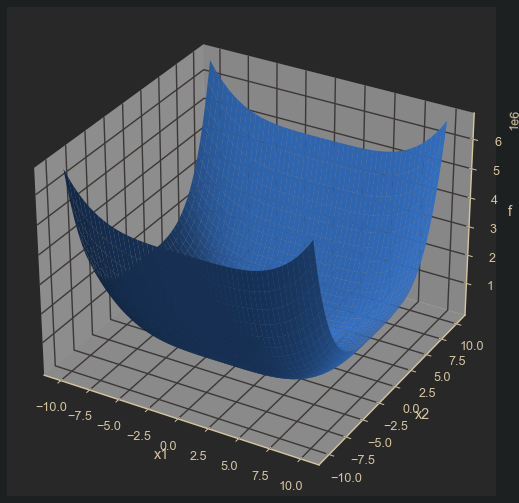

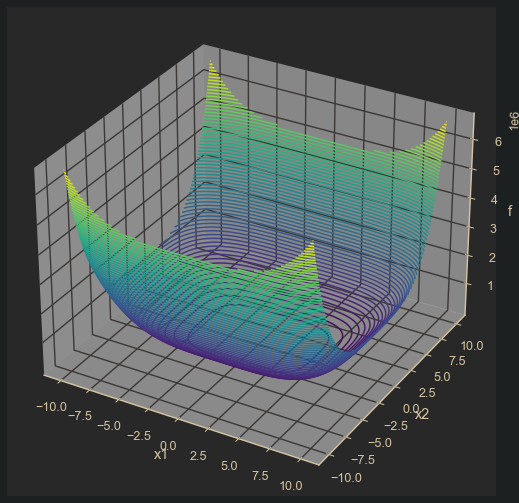

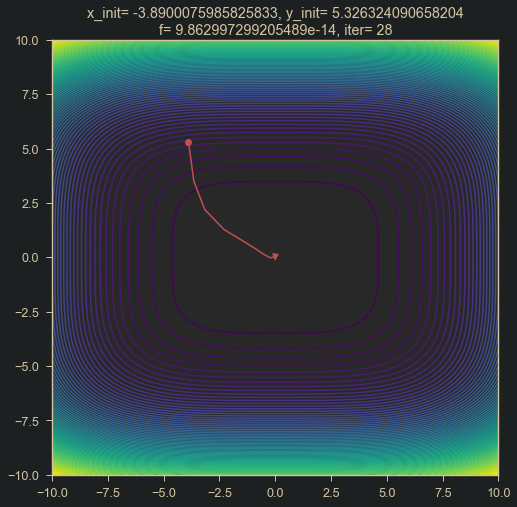

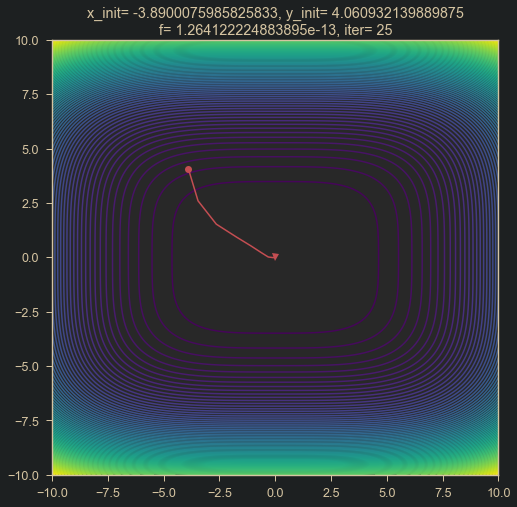

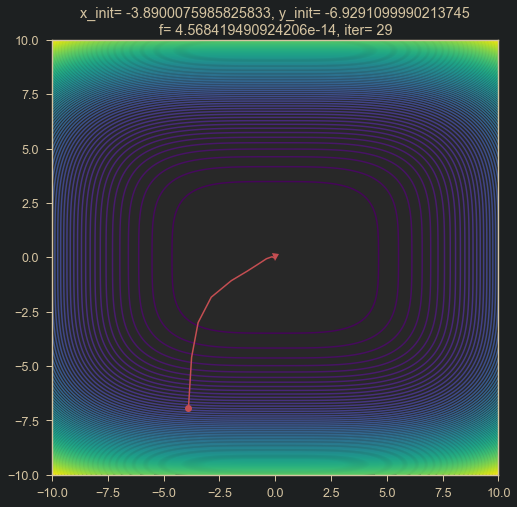

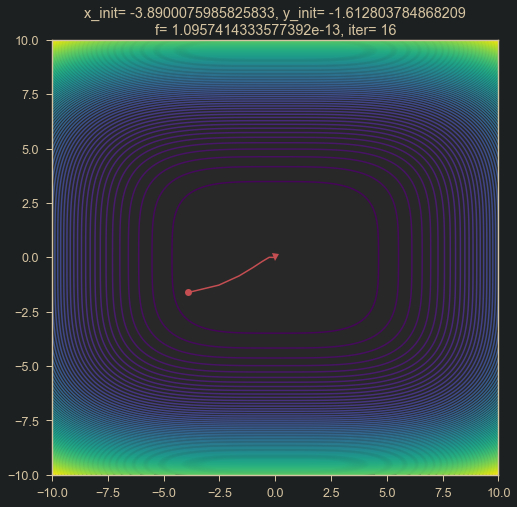

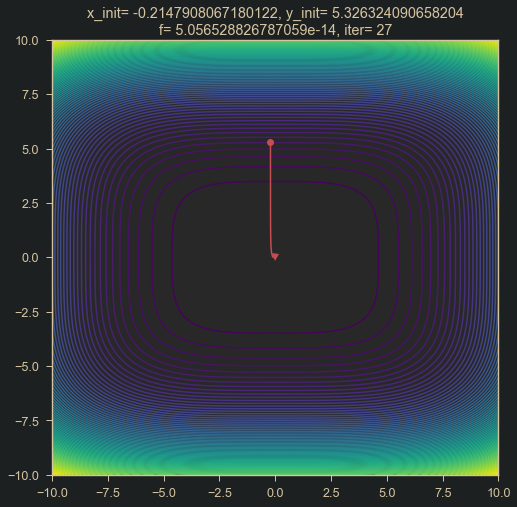

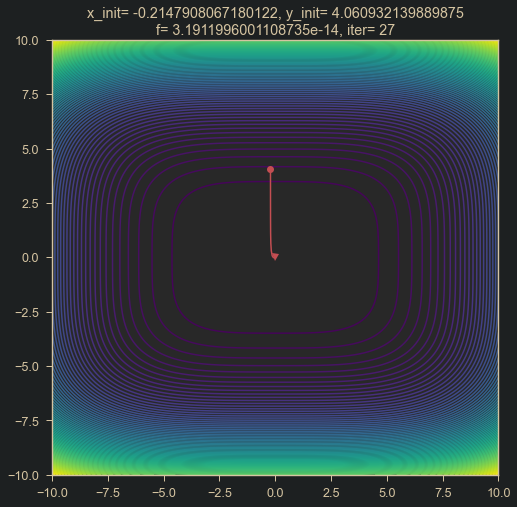

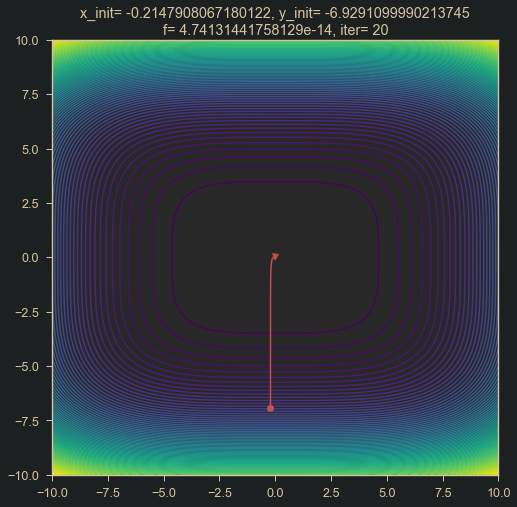

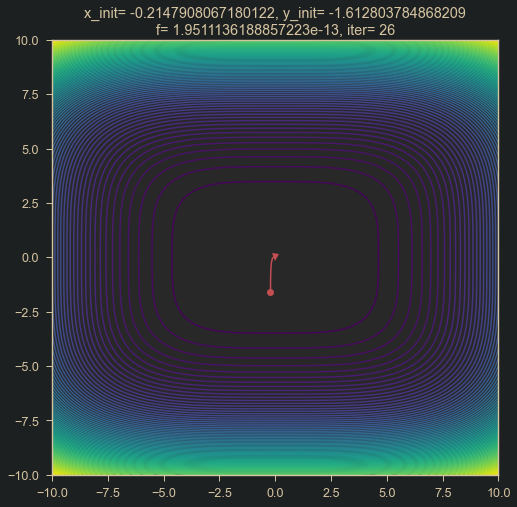

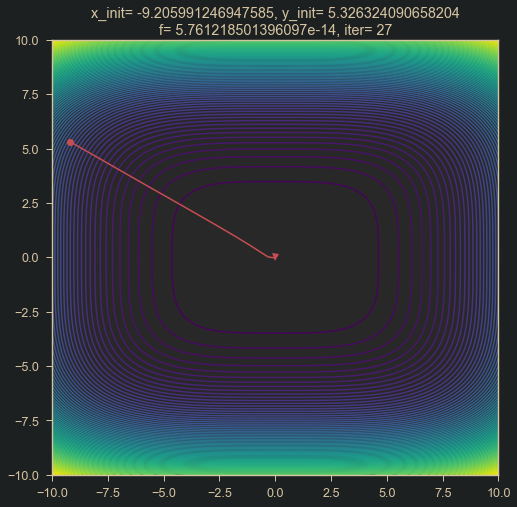

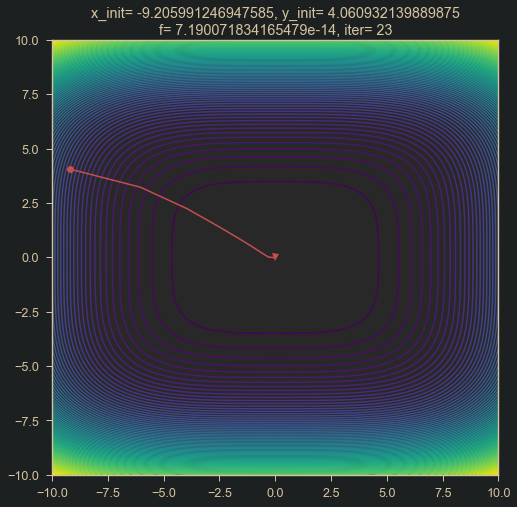

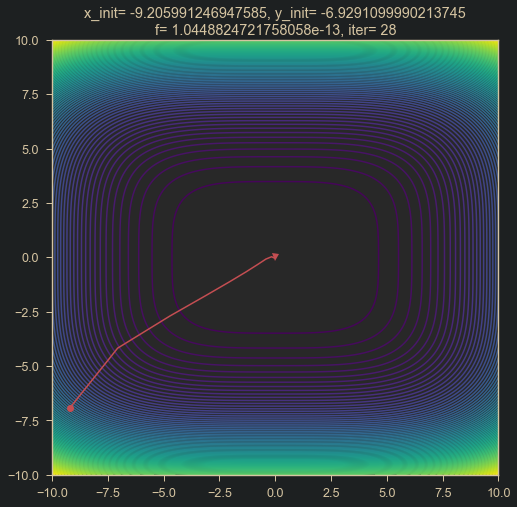

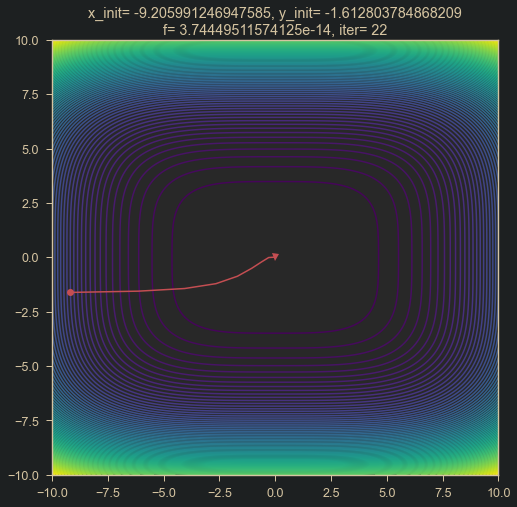

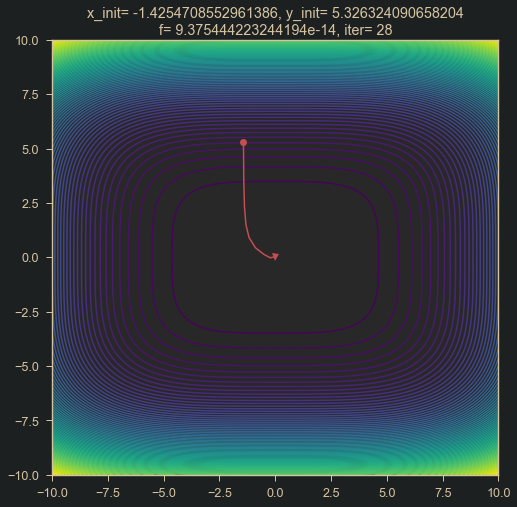

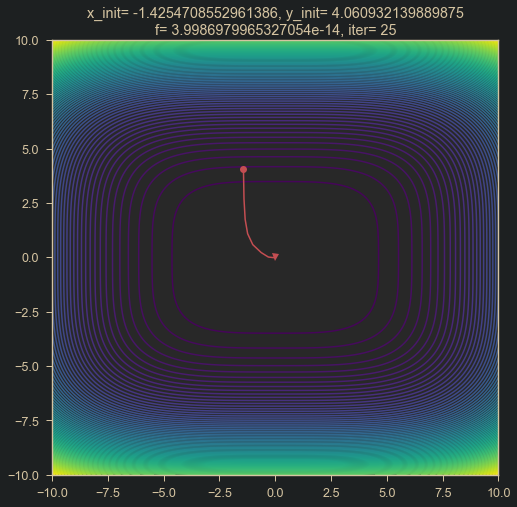

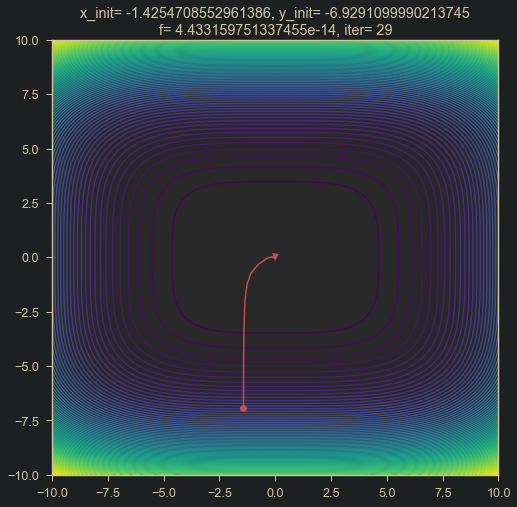

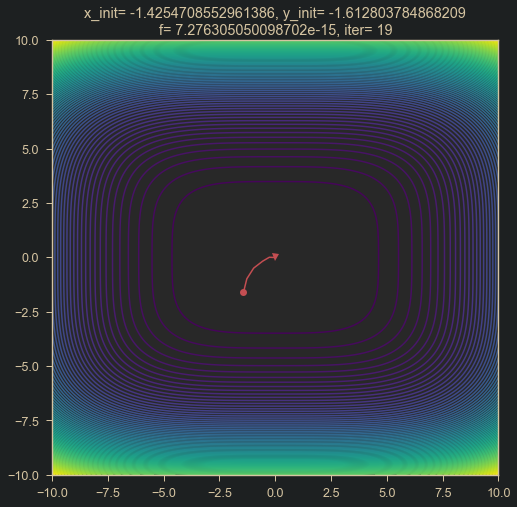

In [2]:
# # defining f
# def f(x,y,mu_x,mu_y,var_x,var_y):
#     return 1-np.exp(-((x-mu_x)**2/(2*var_x)+(y-mu_y)**2/(2*var_y)));
# # defining g
# def g_x (x,y,mu_x,mu_y,var_x,var_y):
#     return (1-f(x,y,mu_x,mu_y,var_x,var_y))*((x-mu_x)/var_x);
# def g_y (x,y,mu_x,mu_y,std_x,std_y):
#     return (1-f(x,y,mu_x,mu_y,var_x,var_y))*((y-mu_y)/var_y);
# # defining H
# def H_xx (x,y,mu_x,mu_y,var_x,var_y):
#     return (1-f(x,y,mu_x,mu_y,var_x,var_y))*(1/var_x-((x-mu_x)/var_x)**2);
# def H_yy (x,y,mu_x,mu_y,std_x,std_y):
#     return (1-f(x,y,mu_x,mu_y,var_x,var_y))*(1/var_y-((y-mu_y)/var_y)**2);
# def H_xy (x,y,mu_x,mu_y,std_x,var_y):
#     return (f(x,y,mu_x,mu_y,var_x,var_y)-1)*((y-mu_y)/var_y)*((x-mu_x)/var_x);

def f(x,y,mu_x,mu_y,var_x,var_y):
    return ((x-mu_x)**2)/var_x+((y-mu_y)**2)/var_y + ((x-mu_x)**4)/var_x+((y-mu_y)**4)/var_y;
def g_x (x,y,mu_x,mu_y,var_x,var_y):
    return 2*((x-mu_x))/var_x + 4*((x-mu_x)**3)/var_x;
def g_y (x,y,mu_x,mu_y,std_x,std_y):
    return 2*((y-mu_y))/var_y + 4*((y-mu_y)**3)/var_y;
def H_xx (x,y,mu_x,mu_y,var_x,var_y):
    return 2/var_x + 12*((x-mu_x)**2)/var_x;
def H_yy (x,y,mu_x,mu_y,std_x,std_y):
    return 2/var_y + 12*((y-mu_y)**2)/var_y;
def H_xy (x,y,mu_x,mu_y,std_x,var_y):
    return 0;

# def f(x,y,mu_x,mu_y,var_x,var_y):
#     return ((x-mu_x)**2)/var_x+((y-mu_y)**2)/var_y;
# def g_x (x,y,mu_x,mu_y,var_x,var_y):
#     return 2*((x-mu_x))/var_x;
# def g_y (x,y,mu_x,mu_y,std_x,std_y):
#     return 2*((y-mu_y))/var_y;
# def H_xx (x,y,mu_x,mu_y,var_x,var_y):
#     return 2/var_x;
# def H_yy (x,y,mu_x,mu_y,std_x,std_y):
#     return 2/var_y;
# def H_xy (x,y,mu_x,mu_y,std_x,var_y):
#     return 0;

# alpha_k
def alpha (gk,Hk):
    return (gk.T@gk)/(gk.T@Hk@gk);
# defiing parameters for f (X)
mu_x = 0
mu_y = 0
var_x = 0.006
var_y = 0.002
# Generating 𝑥 and 𝑦, 1000 data points from -10 to 10
x = np.linspace(-10,10,1000);
y = np.linspace(-10,10,1000);
# meshgrid for plotting 3D plots
X,Y = np.meshgrid(x,y);
# generating f(x,y)
fxy = f(X,Y,mu_x,mu_y,var_x,var_y);
# plotting Surface plot
plt.figure(figsize=(9,9))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, fxy)
ax.set_xlabel('x1');
ax.set_ylabel('x2');
ax.set_zlabel('f');
#plotting contour 3D plot
plt.figure(figsize=(9,9))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, fxy,80)
ax.set_xlabel('x1');
ax.set_ylabel('x2');
ax.set_zlabel('f');
# array of initial values of x ,y
# x_init_arr = [0.1,-0.2];
# y_init_arr = [0.4,-0.5];
x_init_arr = np.random.uniform(-10,10,4)
y_init_arr = np.random.uniform(-10,10,4)
# looping over inital points
for x_init in x_init_arr:
    for y_init in y_init_arr:
        # counting iterations
        iter = 0;
        x_hist = np.array([]); # history array to store all values of x in each update
        y_hist = np.array([]); # history array to store all values of y in each update
        x_hist = np.append(x_hist,x_init); # appending initial value to array
        y_hist = np.append(y_hist,y_init); # appending initial value to array
        # loop to get updates till convergence
        while (g_x(x_hist[-1],y_hist[-1],mu_x,mu_y,var_x,var_y)>= 0.00001 or 
               g_x(x_hist[-1],y_hist[-1],mu_x,mu_y,var_x,var_y)<=-0.00001 or 
               g_y(x_hist[-1],y_hist[-1],mu_x,mu_y,var_x,var_y)>= 0.00001 or 
               g_y(x_hist[-1],y_hist[-1],mu_x,mu_y,var_x,var_y)<=-0.00001):
#         while (g_x(x_hist[-1],y_hist[-1],mu_x,mu_y,var_x,var_y)== 0 and g_y(x_hist[-1],y_hist[-1],mu_x,mu_y,var_x,var_y)== 0):       
            x_old = x_hist[-1]; # old x before update
            y_old = y_hist[-1]; # old y before update
            #defining gk Hk alpha_k dk
            gk = np.array([[g_x(x_old,y_old,mu_x,mu_y,var_x,var_y)],[g_y(x_old,y_old,mu_x,mu_y,var_x,var_y)]]);
            Hk = np.array([[H_xx(x_old,y_old,mu_x,mu_y,var_x,var_y),H_xy(x_old,y_old,mu_x,mu_y,var_x,var_y)],
                           [H_xy(x_old,y_old,mu_x,mu_y,var_x,var_y),H_yy(x_old,y_old,mu_x,mu_y,var_x,var_y)]]);
#             print(Hk)
            dk = -gk
            alpha_k = alpha(gk,Hk);
#             print(alpha_k)
            x_up = x_old + alpha_k*dk[0]; # updating x
            y_up = y_old + alpha_k*dk[1]; # updating y
            x_hist = np.append(x_hist,x_up); # appending updated x to history array
            y_hist = np.append(y_hist,y_up); # appending updated y to history array
            iter+=1;
        # defining figure and size
        plt.figure(figsize=(8,8))
        # plotting 2D contour plots
        plt.contour(X, Y, fxy,100);
        # plotting history of updates
        plt.plot(x_hist,y_hist,'r')
        # plotting optimal value
        plt.plot(x_hist[-1],y_hist[-1],color='r',marker='v')
        # plotting initial value
        plt.plot(x_hist[0],y_hist[0],color='r',marker='o')
        # title
        plt.title("x_init= "+str(x_init)+", y_init= "+str(y_init)
                  +"\nf= "+str(f(x_hist[-1],y_hist[-1],mu_x,mu_y,var_x,var_y))+", iter= "+str(iter))

## Newton Method
Two-dimensional Gaussian function used is : $Gauss(x,y) = e^{-(\frac{(x-\mu_x)^2}{2\sigma_x^2}+\frac{(y-\mu_y)^2}{2\sigma_y^2})}\\$
I took $f(x,y) = 1 - Gauss(x,y)$ to get a minima point at (0,0).

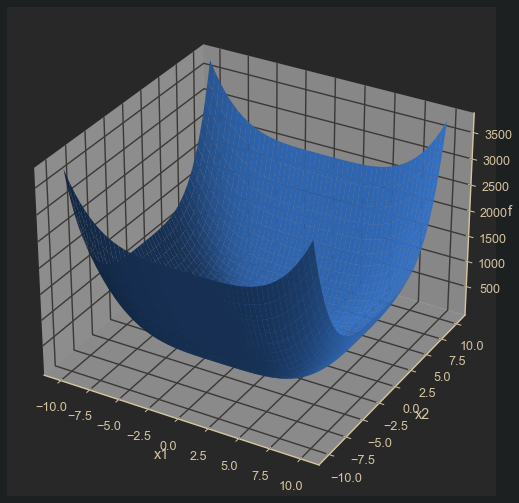

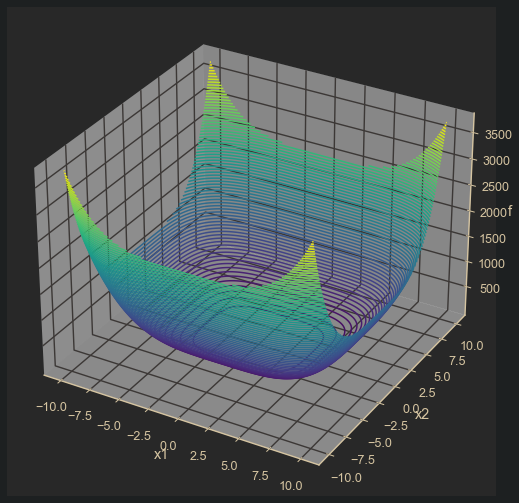

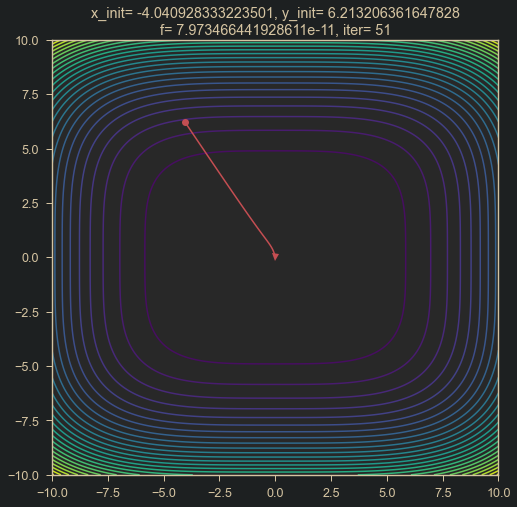

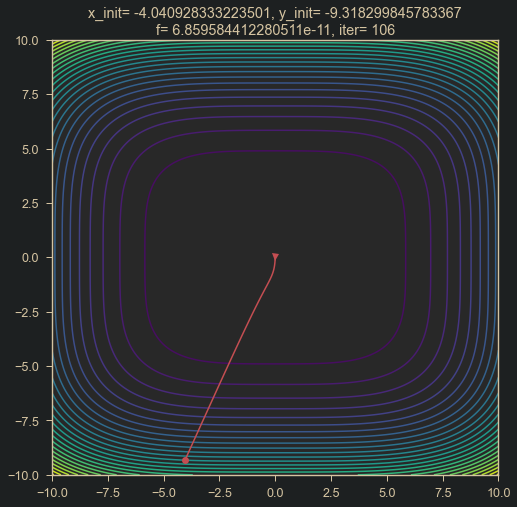

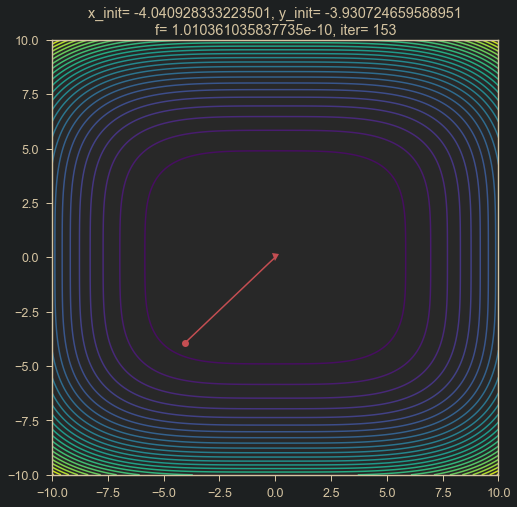

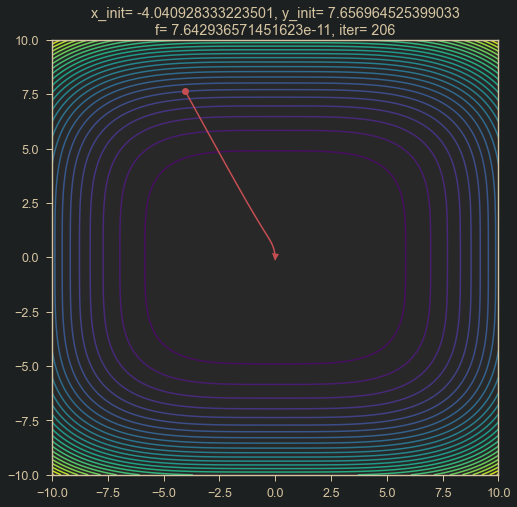

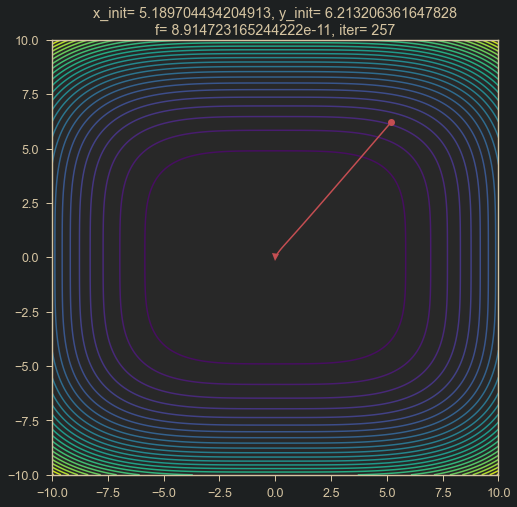

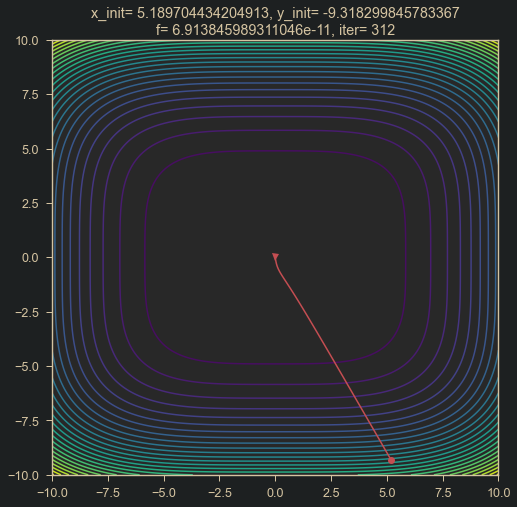

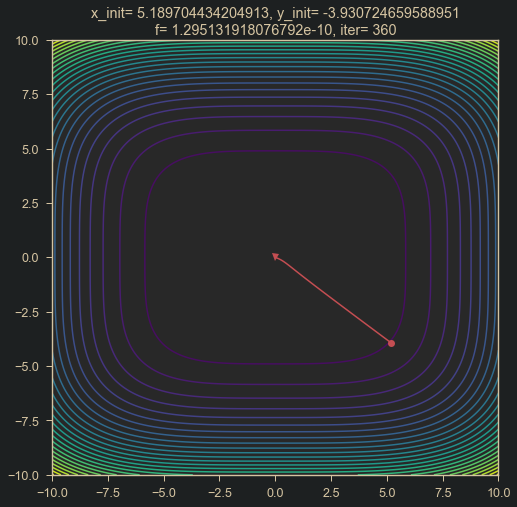

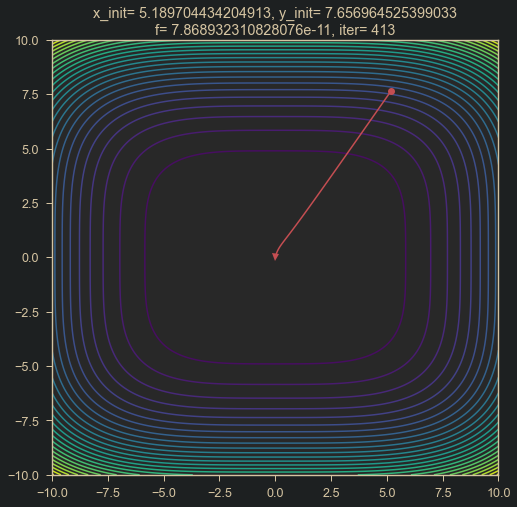

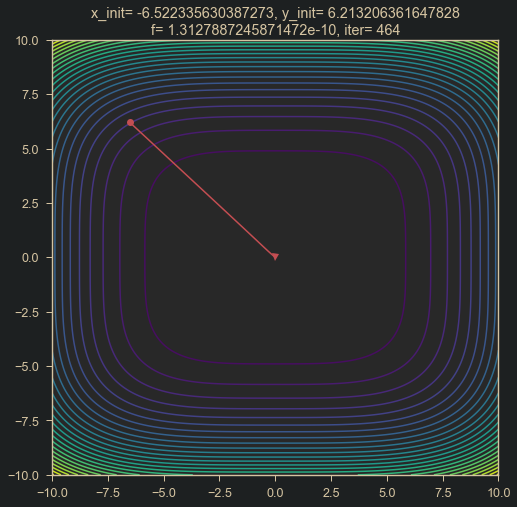

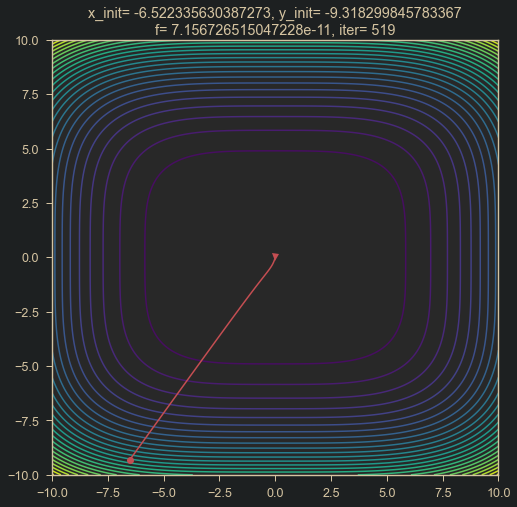

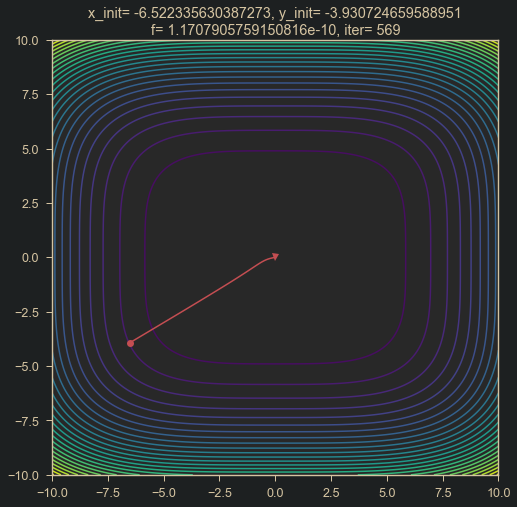

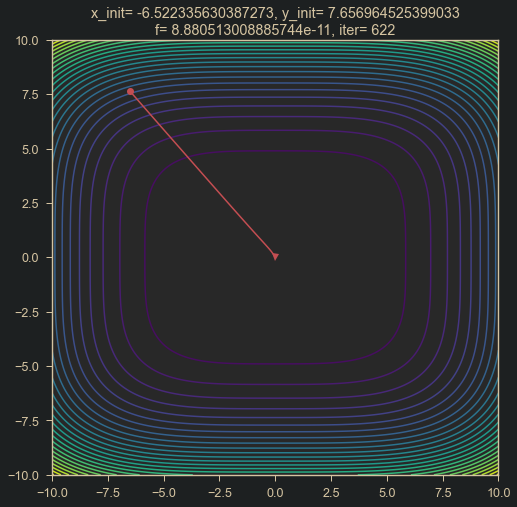

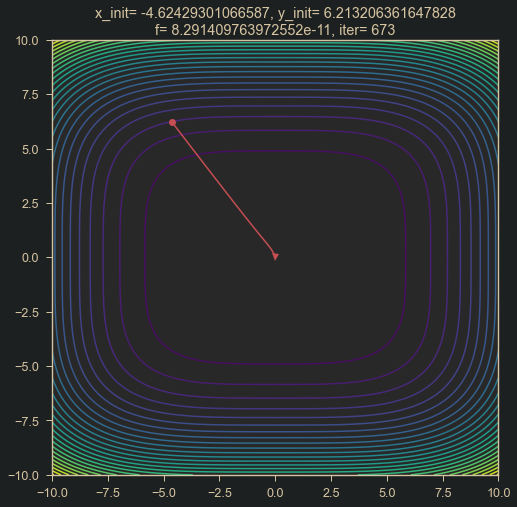

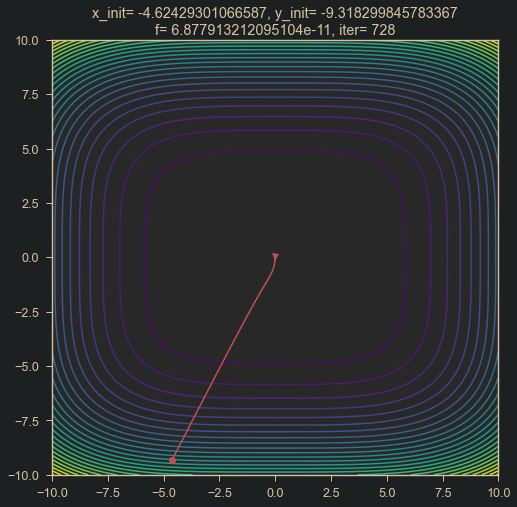

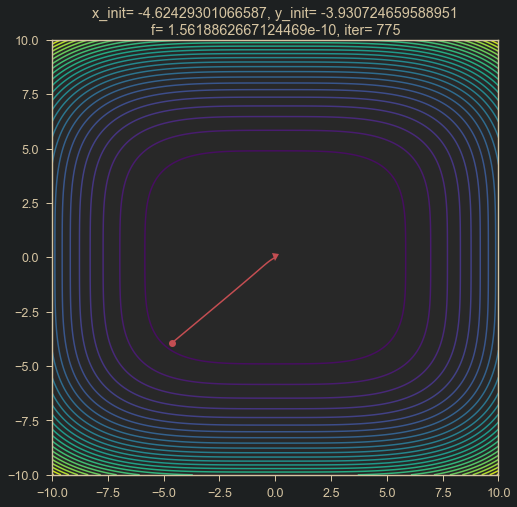

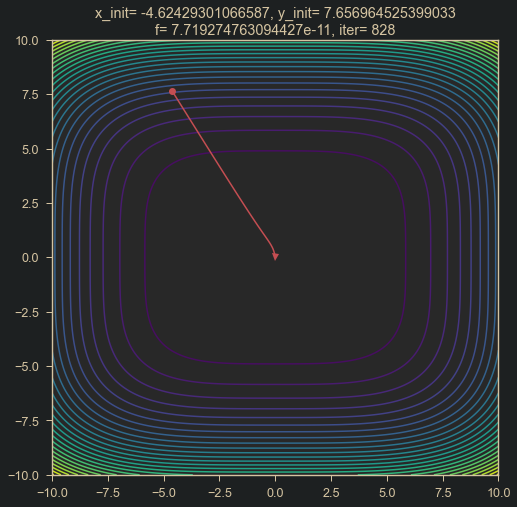

In [3]:
# # defining f
# def f(x,y,mu_x,mu_y,var_x,var_y):
#     return 1-np.exp(-((x-mu_x)**2/(2*var_x)+(y-mu_y)**2/(2*var_y)));
# # defining g
# def g_x (x,y,mu_x,mu_y,var_x,var_y):
#     return (1-f(x,y,mu_x,mu_y,var_x,var_y))*((x-mu_x)/var_x);
# def g_y (x,y,mu_x,mu_y,std_x,std_y):
#     return (1-f(x,y,mu_x,mu_y,var_x,var_y))*((y-mu_y)/var_y);
# # defining H
# def H_xx (x,y,mu_x,mu_y,var_x,var_y):
#     return (1-f(x,y,mu_x,mu_y,var_x,var_y))*(1/var_x-((x-mu_x)/var_x)**2);
# def H_yy (x,y,mu_x,mu_y,std_x,std_y):
#     return (1-f(x,y,mu_x,mu_y,var_x,var_y))*(1/var_y-((y-mu_y)/var_y)**2);
# def H_xy (x,y,mu_x,mu_y,std_x,var_y):
#     return (f(x,y,mu_x,mu_y,var_x,var_y)-1)*((y-mu_y)/var_y)*((x-mu_x)/var_x);

def f(x,y,mu_x,mu_y,var_x,var_y):
    return ((x-mu_x)**2)/var_x+((y-mu_y)**2)/var_y + ((x-mu_x)**4)/var_x+((y-mu_y)**4)/var_y;
def g_x (x,y,mu_x,mu_y,var_x,var_y):
    return 2*((x-mu_x))/var_x + 4*((x-mu_x)**3)/var_x;
def g_y (x,y,mu_x,mu_y,std_x,std_y):
    return 2*((y-mu_y))/var_y + 4*((y-mu_y)**3)/var_y;
def H_xx (x,y,mu_x,mu_y,var_x,var_y):
    return 2/var_x + 12*((x-mu_x)**2)/var_x;
def H_yy (x,y,mu_x,mu_y,std_x,std_y):
    return 2/var_y + 12*((y-mu_y)**2)/var_y;
def H_xy (x,y,mu_x,mu_y,std_x,var_y):
    return 0;

# defiing parameters for f (X)
mu_x = 0
mu_y = 0
var_x = 8
var_y = 4
# Generating 𝑥 and 𝑦, 1000 data points from -10 to 10
x = np.linspace(-10,10,1000);
y = np.linspace(-10,10,1000);
# meshgrid for plotting 3D plots
X,Y = np.meshgrid(x,y);
# generating f(x,y)
fxy = f(X,Y,mu_x,mu_y,var_x,var_y);
# plotting Surface plot
plt.figure(figsize=(9,9))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, fxy)
ax.set_xlabel('x1');
ax.set_ylabel('x2');
ax.set_zlabel('f');
#plotting contour 3D plot
plt.figure(figsize=(9,9))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, fxy,80)
ax.set_xlabel('x1');
ax.set_ylabel('x2');
ax.set_zlabel('f');
# array of initial values of x ,y
# x_init_arr = [1,-2];
# y_init_arr = [1.5,-0.5];
x_init_arr = np.random.uniform(-10,10,4)
y_init_arr = np.random.uniform(-10,10,4)
# counting iterations
iter = 0;
# looping over inital points
for x_init in x_init_arr:
    for y_init in y_init_arr:
        x_hist = np.array([]); # history array to store all values of x in each update
        y_hist = np.array([]); # history array to store all values of y in each update
        x_hist = np.append(x_hist,x_init); # appending initial value to array
        y_hist = np.append(y_hist,y_init); # appending initial value to array
        # loop to get updates till convergence
        while (g_x(x_hist[-1],y_hist[-1],mu_x,mu_y,var_x,var_y)>= 0.00001 or 
               g_x(x_hist[-1],y_hist[-1],mu_x,mu_y,var_x,var_y)<=-0.00001 or 
               g_y(x_hist[-1],y_hist[-1],mu_x,mu_y,var_x,var_y)>= 0.00001 or 
               g_y(x_hist[-1],y_hist[-1],mu_x,mu_y,var_x,var_y)<=-0.00001):
            x_old = x_hist[-1]; # old x before update
            y_old = y_hist[-1]; # old y before update
           #defining gk Hk alpha_k dk
            gk = np.array([[g_x(x_old,y_old,mu_x,mu_y,var_x,var_y)],[g_y(x_old,y_old,mu_x,mu_y,var_x,var_y)]]);
            Hk = np.array([[H_xx(x_old,y_old,mu_x,mu_y,var_x,var_y),H_xy(x_old,y_old,mu_x,mu_y,var_x,var_y)],
                           [H_xy(x_old,y_old,mu_x,mu_y,var_x,var_y),H_yy(x_old,y_old,mu_x,mu_y,var_x,var_y)]]);
            dk = (-1)*(np.linalg.inv(Hk)@gk)
            alpha_k = 0.3;
            x_up = x_old + alpha_k*dk[0]; # updating x
            y_up = y_old + alpha_k*dk[1]; # updating y
            x_hist = np.append(x_hist,x_up); # appending updated x to history array
            y_hist = np.append(y_hist,y_up); # appending updated y to history array
            iter+=1;
        # defining figure and size
        plt.figure(figsize=(8,8))
        # plotting 2D contour plots
        plt.contour(X, Y, fxy,30);
        # plotting history of updates
        plt.plot(x_hist,y_hist,'r')
        # plotting optimal value
        plt.plot(x_hist[-1],y_hist[-1],color='r',marker='v')
        # plotting initial value
        plt.plot(x_hist[0],y_hist[0],color='r',marker='o')
        # title
        plt.title("x_init= "+str(x_init)+", y_init= "+str(y_init)
                  +"\nf= "+str(f(x_hist[-1],y_hist[-1],mu_x,mu_y,var_x,var_y))+", iter= "+str(iter))